In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [26]:
loan_approval = pd.read_csv('loan_approval_dataset.csv')

# Data Exploration

In [27]:
loan_approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [28]:
loan_approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [29]:
loan_approval.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [30]:
loan_approval.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [31]:
loan_approval.columns = loan_approval.columns.str.strip()

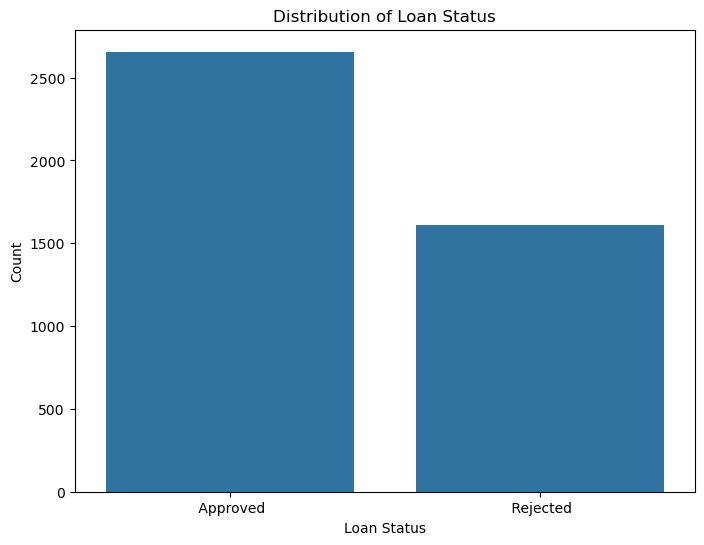

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=loan_approval)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1])
plt.show()

# Data Preprocessing

In [33]:
categorical_data = loan_approval.select_dtypes(include="object").columns

le = LabelEncoder()
for col in categorical_data:
    loan_approval[col] = le.fit_transform(loan_approval[col])

loan_approval.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [34]:
# Replace negative values with 0
loan_approval['residential_assets_value'] = loan_approval['residential_assets_value'].apply(lambda x: max(x, 0))

In [35]:
loan_approval.loan_status.value_counts() # identifying the class imbalance

loan_status
0    2656
1    1613
Name: count, dtype: int64

In [36]:
X = loan_approval.drop(['loan_status'], axis=1)
y = loan_approval['loan_status']

In [37]:
# Splitting the data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [41]:
smote = SMOTE(random_state=100)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts())

Class distribution after SMOTE:
 loan_status
0    2119
1    2119
Name: count, dtype: int64


In [42]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=100,max_iter=1000)

In [43]:
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test)

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-Score:", f1_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.8126463700234192
Recall: 0.7444794952681388
F1-Score: 0.7468354430379747

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       537
           1       0.75      0.74      0.75       317

    accuracy                           0.81       854
   macro avg       0.80      0.80      0.80       854
weighted avg       0.81      0.81      0.81       854



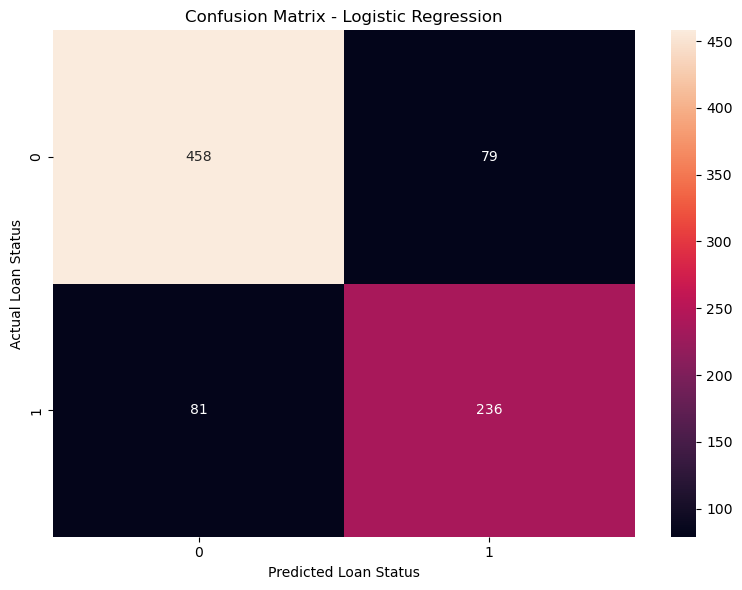

In [45]:
cm = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Loan Status')
plt.xlabel('Predicted Loan Status')
plt.tight_layout()
plt.show()

In [46]:
# Decison Tree
dt_classifier = DecisionTreeClassifier(random_state=100, max_depth=5)

In [47]:
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_classifier.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-Score:", f1_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9625292740046838
Precision: 0.9106628242074928
Recall: 0.9968454258675079
F1-Score: 0.9518072289156626

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       537
           1       0.91      1.00      0.95       317

    accuracy                           0.96       854
   macro avg       0.95      0.97      0.96       854
weighted avg       0.97      0.96      0.96       854



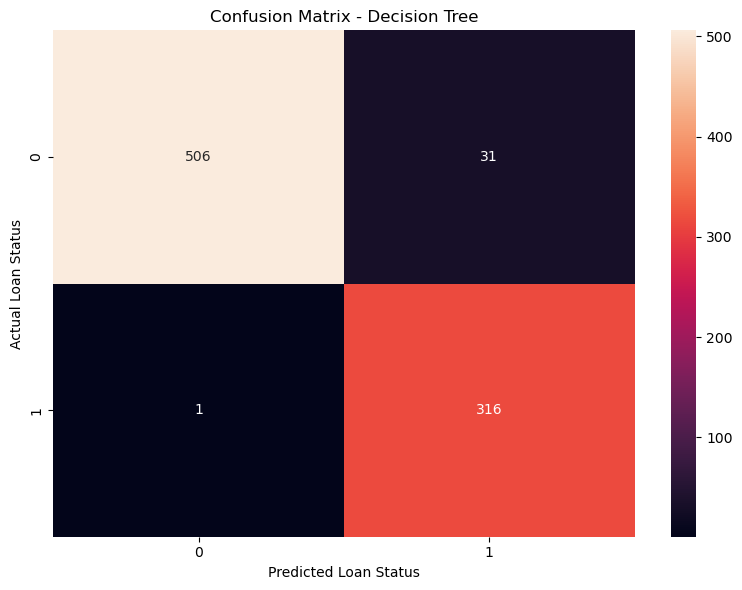

In [49]:
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual Loan Status')
plt.xlabel('Predicted Loan Status')
plt.tight_layout()
plt.show()